In [1]:
# Teste inicial em vit
# Importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
import random

import tensorflow as tf

# Definindo semente
seed = 42

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

# Carregar dados cbisddsm

WORK_DIR = os.getcwd()
UP_DIR = os.path.dirname(WORK_DIR)
UP_DIR = os.path.dirname(UP_DIR)
DATADIR = os.path.join(UP_DIR, 'data', 'cbis-ddsm')
CATEGORIES = ['BENIGN', 'MALIGNANT']

# csv com os dados das imagens
df_train = pd.read_csv(os.path.join(DATADIR, 'Train', 'clean_mass_train_description2.csv'))
df_test = pd.read_csv(os.path.join(DATADIR, 'Test', 'clean_mass_test_description2.csv'))

# Verificando os dados
print(df_train.head())
print(df_test.head())

# Verificando o tamanho dos dados
print(df_train.shape)
print(df_test.shape)

# Verificando a distribuição das classes
print(df_train['pathology'].value_counts())
print(df_test['pathology'].value_counts())

# Verificando a distribuição das classes
print(df_train['breast_density'].value_counts())
print(df_test['breast_density'].value_counts())

# Verificando a distribuição das classes
print(df_train['left or right breast'].value_counts())
print(df_test['left or right breast'].value_counts())


# Exclude Begnin withouth callback
df_train = df_train[df_train['pathology'] != 'BENIGN_WITHOUT_CALLBACK']
df_test = df_test[df_test['pathology'] != 'BENIGN_WITHOUT_CALLBACK']


# Verificando a distribuição das classes
print(df_train['pathology'].value_counts())
print(df_test['pathology'].value_counts())



2024-03-04 23:51:29.958861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 23:51:29.959036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 23:51:29.995344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 23:51:30.075103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-04 23:51:31.482481: W tensorflow/compiler/tf2

  patient_id  breast_density left or right breast  pathology  \
0    P_00001               3                 LEFT  MALIGNANT   
1    P_00004               3                 LEFT     BENIGN   
2    P_00009               3                RIGHT  MALIGNANT   
3    P_00018               2                RIGHT     BENIGN   
4    P_00021               1                 LEFT     BENIGN   

                        image file path  
0   Mass-Training_P_00001_LEFT_CC_1.png  
1   Mass-Training_P_00004_LEFT_CC_1.png  
2  Mass-Training_P_00009_RIGHT_CC_1.png  
3  Mass-Training_P_00018_RIGHT_CC_1.png  
4   Mass-Training_P_00021_LEFT_CC_1.png  
  patient_id  breast_density left or right breast  pathology  \
0    P_00016               4                 LEFT  MALIGNANT   
1    P_00017               2                 LEFT  MALIGNANT   
2    P_00032               3                RIGHT     BENIGN   
3    P_00037               3                RIGHT  MALIGNANT   
4    P_00066               4               

2024-03-04 23:51:33.452039: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-04 23:51:33.719252: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-04 23:51:33.719319: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# imports para processamento dos dados 
import cv2
from sklearn.model_selection import train_test_split
import random


# Preparando os dados

CATEGORIES = ['BENIGN', 'MALIGNANT']
IMG_SIZE = 224
def create_training_data(df, img_size, categories, datadir):
    training_data = []
    for index, row in df.iterrows():
        try:
            img_array = plt.imread(os.path.join(datadir, row['image file path']), 0)
            new_array = cv2.resize(img_array, (img_size, img_size))
            # To Numpy array
            new_array = np.array(new_array)
            training_data.append([new_array, categories.index(row['pathology'])])
            # Benign = 0, Malignant = 1
                        

            print(index)
        except Exception as e:
            print(e)
            pass
    return training_data

train_data = create_training_data(df_train, IMG_SIZE, CATEGORIES, os.path.join(DATADIR, 'Train', 'Train'))
testing_data = create_training_data(df_test, IMG_SIZE, CATEGORIES, os.path.join(DATADIR, 'Test', 'Test'))

# Verificando o tamanho dos dados
print(len(train_data))
print(len(testing_data))

# Verificando os dados
print(train_data[0])
print(testing_data[0])

# Embaralhando os dados
random.shuffle(train_data)
random.shuffle(testing_data)


# Separando os dados
X_train = []
y_train = []
for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

X_test = []
y_test = []
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)


# Convertendo para numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


0
1
2
3
4
5
6
7
8
9
10
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
111
112
113
114
115
116
117
119
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
210
211
212
213
214
215
216
217
218
219
220
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
241
242
243
244
245
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
29

(224, 224)
(224, 224)
float32
float32
(224, 224)
(224, 224)


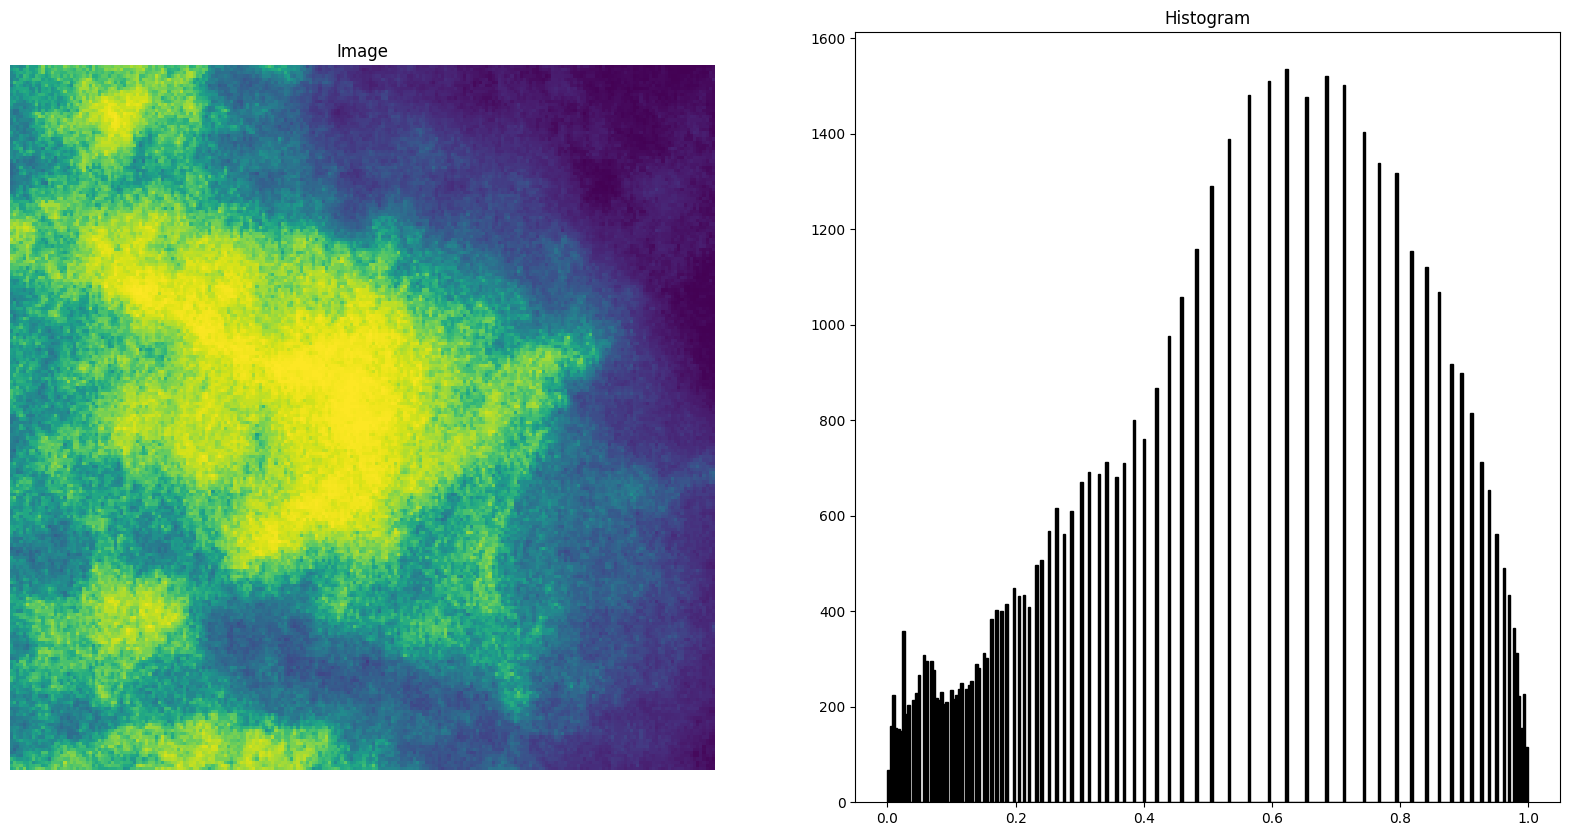

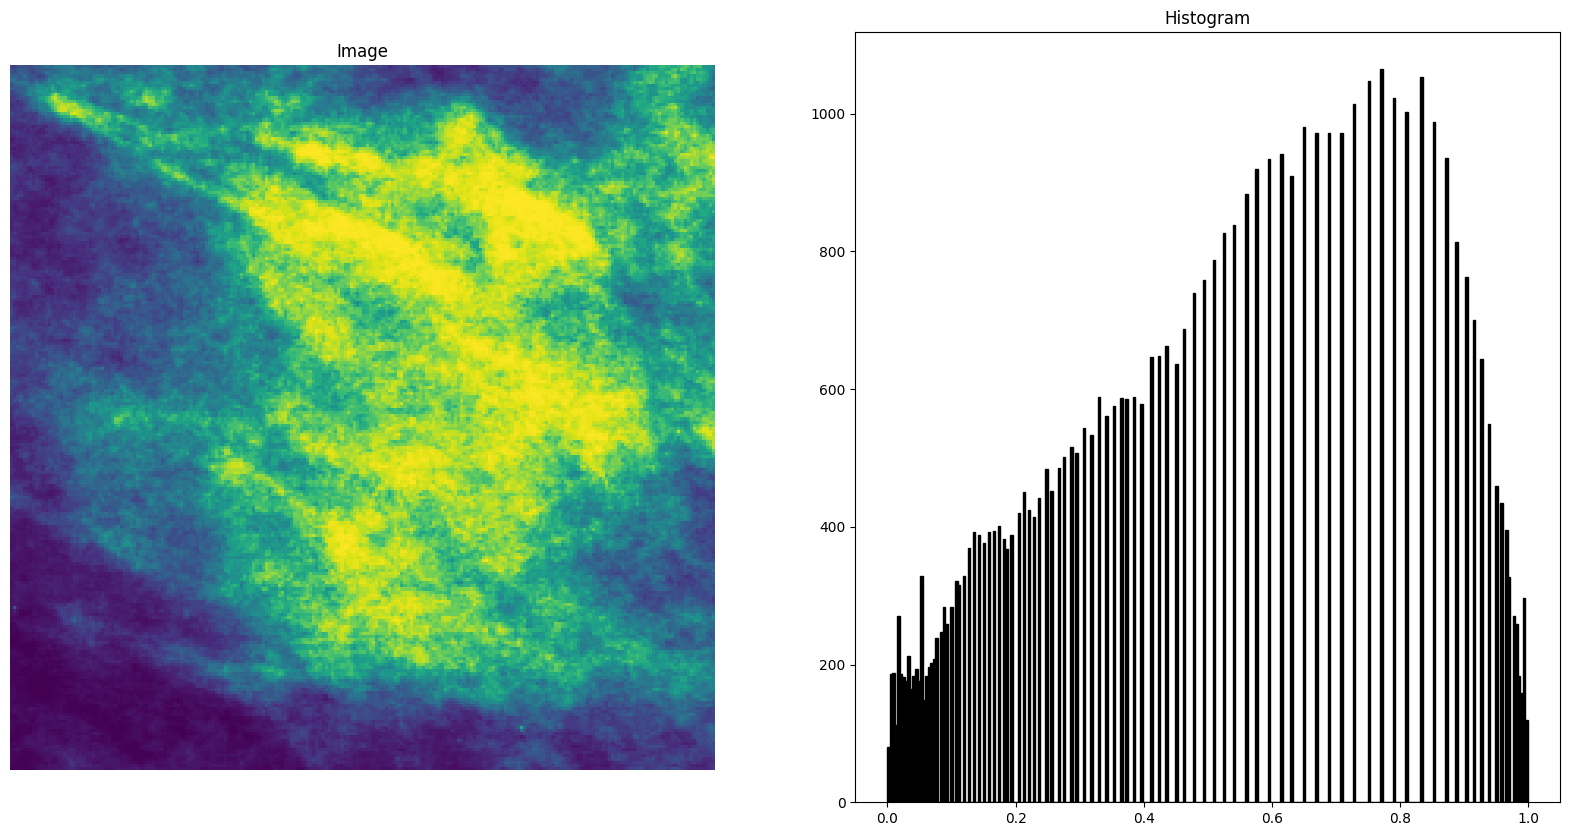

In [3]:
# Plot Luma waveforms

# Get histogram of the images
def plot_hist(img):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title('Image')
    ax[1].hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
    ax[1].set_title('Histogram')
    plt.show()

# Equalizing histogram
def equalize_hist(img):
    # Convert to uint8
    img = (img*255).astype(np.uint8)
    img = cv2.equalizeHist(img)
    return img

print(X_train[0].shape)
print(X_test[0].shape)
print(X_train[0].dtype)
print(X_test[0].dtype)


X_test_eq = []
for img in X_test:
    X_test_eq.append(equalize_hist(img))

X_train_eq = []
for img in X_train:
    X_train_eq.append(equalize_hist(img))



print(X_train_eq[0].shape)
print(X_test_eq[0].shape)

# Normalizing the images
X_train_eq = np.array(X_train_eq)
X_test_eq = np.array(X_test_eq)

X_train_eq = X_train_eq / 255.0
X_test_eq = X_test_eq / 255.0



# Plotting the images

for i in range(2):
    plot_hist(X_train_eq[i])

In [4]:
# Métricas de media e desvio padrão dos dados
print(X_train.shape)
print(X_test.shape)
print(np.mean(X_train))
print(np.std(X_train))
print(np.mean(X_test))
print(np.std(X_test))


# To 3 channels
X_train_3 = np.stack((X_train,)*3, axis=-1)
X_test_3 = np.stack((X_test,)*3, axis=-1)

(569, 224, 224)
(161, 224, 224)
0.72623706
0.16412066
0.7386327
0.16494967


In [5]:
# Generate ViT Model
from vit_keras import  vit
import tensorflow as tf
# Model configuration
img_size = 224
patch_size = 16
num_classes = 2
CATEGORIES = ['BENIGN', 'MALIGNANT']
vit_model = vit.vit_b16(
    image_size = img_size,
    activation = 'sigmoid',
    pretrained = True,
    include_top = True,
    pretrained_top = False,
    classes = num_classes
)
#  We train all models, including ResNets, using Adam (Kingma & Ba,
# 2015) with b1 = 09, b2 = 0999, a batchsize of 4096 and apply a 
#high weight decay of 0.1
# we found to be useful for transfer of all models (Appendix D.1 shows that, in contrast to common
# practices, Adam works slightly better than SGD for ResNets in our setting). We use a linear learning
# rate warmup and decay, see Appendix B.1 for details. For fine-tuning we use SGD with momentum,
# batch size 512, for all models, see Appendix B.1.1. For ImageNet results in Table 2, we fine-tuned at
# higher resolution: 512 for ViT-L/16 and 518 for ViT-H/14, and also used Polyak & Juditsky (1992)
# averaging with a factor of 09999 (Ramachandran et al., 2019; Wang et al., 2020b)

# Print the model summary
vit_model.summary()

# Only head training
for layer in vit_model.layers[:-1]:
    layer.trainable = False

# Summary
vit_model.summary()





/home/vdgaete/anaconda3/envs/py310/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2024-03-04 23:51:46.728179: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-04 23:51:46.728306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA su

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 14, 14, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 196, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 197, 768)          768       
                                                                 
 Transformer/posembed_input  (None, 197, 768)          151296    
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 197, 768),        7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [6]:


# Compile the model
vit_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
    metrics = ['accuracy']
)

# Train the model
history = vit_model.fit(
    X_train_3, y_train,
    validation_data = (X_test_3, y_test),
    epochs = 100,
    batch_size = 64,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
        tf.keras.callbacks.ModelCheckpoint('vit_best.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
    ]
)



Epoch 1/100


2024-03-04 23:51:58.841095: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/9 [==>...........................] - ETA: 1:37 - loss: 0.9037 - accuracy: 0.5156

2024-03-04 23:52:02.018546: I external/local_xla/xla/service/service.cc:168] XLA service 0x7effae4c4290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-04 23:52:02.018602: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
I0000 00:00:1709607122.088179  144597 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - ETA: 0s - loss: 8.2363 - accuracy: 0.5097
Epoch 1: val_loss improved from inf to 33.92686, saving model to vit_best.h5
9/9 [==============================] - 27s 2s/step - loss: 8.2363 - accuracy: 0.5097 - val_loss: 33.9269 - val_accuracy: 0.4161
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 20.7762 - accuracy: 0.5729
Epoch 2: val_loss did not improve from 33.92686
9/9 [==============================] - 13s 1s/step - loss: 20.7762 - accuracy: 0.5729 - val_loss: 40.2927 - val_accuracy: 0.4224
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 13.7767 - accuracy: 0.6186
Epoch 3: val_loss improved from 33.92686 to 20.23816, saving model to vit_best.h5
9/9 [==============================] - 13s 2s/step - loss: 13.7767 - accuracy: 0.6186 - val_loss: 20.2382 - val_accuracy: 0.5155
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 7.9120 - accuracy: 0.6924
Epoch 4: val_loss improved from 20.23816 to 6

In [14]:
from datetime import datetime

# Get the current date and time
now = datetime.now()

# Format the date and time
date_time = now.strftime("%Y-%m-%d-%H-%M-%S")

# Print the date and time
print("Current Date and Time:", date_time)
# Save the model checkpoint 
vit_model.save("vit_model_"+date_time+".keras")


Current Date and Time: 2024-03-05-00-02-34


 cnn_model.h5		      vit-inicial.ipynb
 mobilenetv2_model.h5	      vit_best.h5
 resnet50_model.h5	      vit_best_a.h5
 setup.ipynb		      vit_best_b.h5
 testetreinamento-CNN.ipynb  'vit_model_2024-03-04 23:59:44.h5'
 vgg16_model.h5		     'vit_model_2024-03-05 00:00:20.keras'
 vgg16_step2_model.h5


6/6 [==============================] - 3s 476ms/step - loss: 2.4975 - accuracy: 0.6584
Loss:  2.4974730014801025
Accuracy:  0.6583850979804993


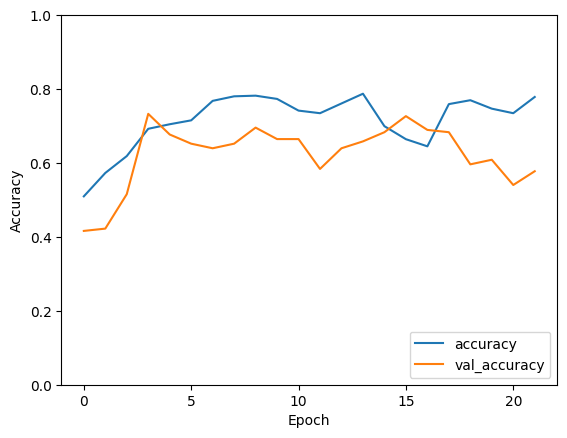

Text(0, 0.5, 'Loss')

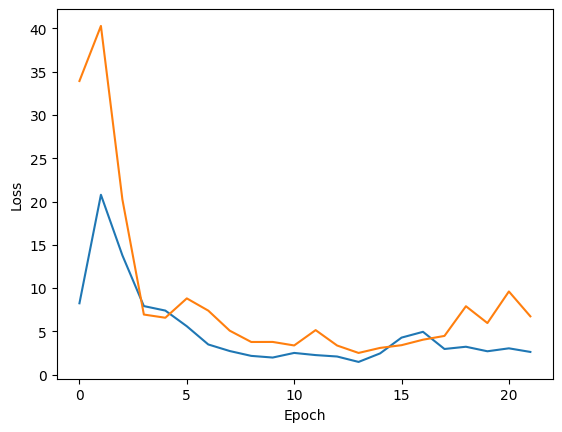

In [15]:
# Load the best model
vit_model.load_weights('vit_best.h5')

# Evaluation 
loss, accuracy = vit_model.evaluate(X_test_3, y_test, batch_size=32)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

# Plotting the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plotting the training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

